#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Eyal Michaeli

**Student ID**: 207380528

**Date**: 29.03.22

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


## Answer - problem 1

### Section 1

Given that $\Sigma = I_9$, we know that for each pair in $Z_1,..., Z_9$, they are pair-wise independent (for every $Z_i, Z_j, i \neq j$)

For $Z_1 + Z_2 + Z_3 + Z_4$ to be independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ we need to prove:
</br>
$Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 0$. <br>

Let's try to open the covariance expression:
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = Cov(Z_1, Z_1) + Cov(Z_1, Z_2) -Cov(Z_1, Z_3) - Cov(Z_1, Z_4) - Cov(Z_1, Z_5) + Cov(Z_2, Z_1) + Cov(Z_2, Z_2) -Cov(Z_2, Z_3) - Cov(Z_2, Z_4) - Cov(Z_2, Z_5) + Cov(Z_3, Z_1) + Cov(Z_3, Z_2) -Cov(Z_3, Z_3) - Cov(Z_3, Z_4) - Cov(Z_3, Z_5) + Cov(Z_4, Z_1) + Cov(Z_4, Z_2) -Cov(Z_4, Z_3) - Cov(Z_4, Z_4) - Cov(Z_4, Z_5) 
$$

But we already know that the pairs are pair-wise independent, we also know that $$cov(x, x) = var(x)$$ we get:

$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 1 + 0 - 0 - 0 - 0 +0 + 1 - 0 - 0 - 0 + 0 + 0 - 1 - 0 - 0 + 0 + 0 + 0 - 1 - 0 = 0
$$

Done

### Section 2

Given non-random matrices $A$, $B$, we know that $Cov(AX, BY) = A Cov(X,Y) B^T$. <br>
So, $Cov(X,Y) = Cov(AZ, BZ) = A Cov(Z,Z) B^T = A Var(Z) B^T$ 
</br>
Let's check if $X$, $Y$ are independent: we'll solve:
$$ Cov(X,Y) = 0 $$
$$A Var(Z) B^T = 0 $$

-->
The conditions are:
1. $A, B \in \reals^{n \times n} $
2. $A Var(Z) = 0$ 
</br>
or
</br>
$Var(Z) B^T = 0$

### Section 3

I'll answer that in a similar fashion to the first section:

* They are not independent. We know that When we calculate the expression $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j})$, we will iterate over the same $Z_{ij}$ several times. For example: let's take i = j = 1, we have $Z_{11}$ when iterating over both $\bar{Z}_{i\bullet}$ and over $\bar{Z}_{\bullet j}$. Therefore --> the same normal RVs is a part of both $\bar{Z}_{i\bullet}$, and $\bar{Z}_{\bullet j}$. --> $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) \neq 0$ --> They are not independent.

* Same way as above. They are independent. When we calculate the expression $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet})$, we will not iterate over the same $Z_{ij}$. We know that the normal RVs $Z_{ij}$ are iid, we can conclude that the two RVs are indepedent. Therefore, $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$ --> the variables are independent.

* Same way as above. They aren't independent. $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = cov(\bar{Z}_{i\bullet}, \bar{Z}_{i\bullet}) - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 1 - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet})$. We know that $\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ have the same $J$ normal RVs, we know that $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) \neq 1$ , --> the RVs aren't independent.

### Section 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import iqr
import scipy.stats as stats

%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)

In [88]:

MAX_ITER = 1000000
print_freq = 100  # iterations


# question 4
def create_samples_multivariate(wanted_cov=0.25, size=1000):
    samples_normal = np.random.normal(loc=0, scale=1, size=size*1000)
    
    permute_half = np.random.permutation(size)
    Z1 = samples_normal[permute_half]
    
    permute_half = np.random.permutation(size)
    Z2 = list(samples_normal[permute_half])
    
    sample_cov = np.cov(Z1, np.array(Z2))[0][1]
    index_to_replace = 0
    successful_sample = 0
    for i in range(MAX_ITER):        
        temp_sample = samples_normal[np.random.randint(0, size*1000)]
        
        temp_Z2 = Z2.copy()
        temp_Z2[index_to_replace] = temp_sample
        temp_Z2 = np.array(temp_Z2)
        temp_sample_cov = np.cov(Z1, temp_Z2)[0][1]
        
            
        if (temp_sample_cov > sample_cov and sample_cov < wanted_cov) or (temp_sample_cov < sample_cov and sample_cov > wanted_cov):
            index_to_replace += 1
            successful_sample = temp_sample
            Z2 = temp_Z2
            sample_cov = temp_sample_cov
            
        if wanted_cov - 0.001 <= sample_cov <= wanted_cov + 0.001:
            print(f"\n\n\nFinished at Iteration={i}, Cov={sample_cov:.4f}, index_to_replace: {index_to_replace}")
            print(f"Last successful sample: {successful_sample:.4f}")
            break
        
        if i % print_freq == 0:
            print(f"\nIteration={i}, Cov={sample_cov:.4f}, index_to_replace: {index_to_replace}")
            print(f"Last successful sample: {successful_sample:.4f}")
            
    return Z1, Z2, sample_cov
                  
Z1, Z2, cov = create_samples_multivariate()  


Iteration=0, Cov=-0.0021, index_to_replace: 0
Last successful sample: 0.0000

Iteration=100, Cov=0.0089, index_to_replace: 20
Last successful sample: 0.8000

Iteration=200, Cov=0.0235, index_to_replace: 50
Last successful sample: 1.6435

Iteration=300, Cov=0.0487, index_to_replace: 83
Last successful sample: -0.7935

Iteration=400, Cov=0.0565, index_to_replace: 96
Last successful sample: 0.5089

Iteration=500, Cov=0.0642, index_to_replace: 105
Last successful sample: -1.3375

Iteration=600, Cov=0.0739, index_to_replace: 122
Last successful sample: 1.0580

Iteration=700, Cov=0.0907, index_to_replace: 139
Last successful sample: -0.9592

Iteration=800, Cov=0.0907, index_to_replace: 139
Last successful sample: -0.9592

Iteration=900, Cov=0.0907, index_to_replace: 139
Last successful sample: -0.9592

Iteration=1000, Cov=0.1062, index_to_replace: 170
Last successful sample: 0.6737

Iteration=1100, Cov=0.1205, index_to_replace: 196
Last successful sample: 1.1048

Iteration=1200, Cov=0.1378,

(-3.808329541208442, 4.450881730359276, -3.856213025251994, 5.456434895273862)

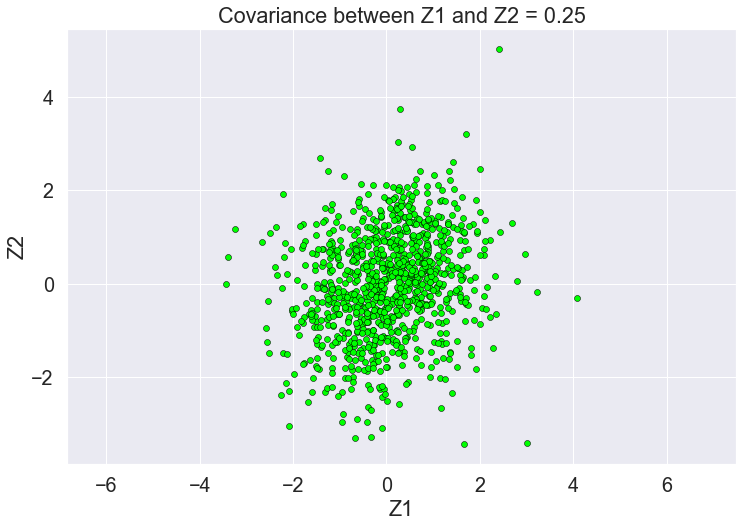

In [87]:
plt.plot(Z1, Z2, 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between Z1 and Z2 = 0.25')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.axis('equal')

Let's try with numpy built-in function as well:

In [ ]:
SIZE = 1000
MEAN = np.array([0, 0])
COV = [
    [1, 0.25],
    [0.25, 1]
]
samples_multivariate = np.random.multivariate_normal(mean=MEAN, cov=COV, size=SIZE)


plt.plot(samples_multivariate[:,0], samples_multivariate[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between Z1 and Z2 = 0.25')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.axis('equal')

### Section 5

#### A

#### B

In [90]:
x1 = Z1
x2 = Z2

indices = np.where( (x1 >= 0) & (x1 <= 1) )
filtered_x1, filtered_x1 = x1[indices], x2[indices]

total_filtered = np.sum(filtered_x1 < 2*filtered_x1)

percent = total_filtered / 1000

print(f"There are {total_filtered} values that satisfy both conditions in A")
print(f"They make up for {100*percent:.1f}%. Which is the integral as well")

There are 212 values that satisfy both conditions in A
They make up for 21.2%. Which is the integral as well


## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

### Section 1

In [96]:
MEAN = np.array([1, 2, 3])
COV = np.array([
    [4, 1, 3],
    [1, 2, 3],
    [3, 3, 8]
])
sig_x, sig_y, sig_z = np.sqrt(4), np.sqrt(2), np.sqrt(8)
rho_x_y = 1 / 4 / 2
rho_x_z = 3 / 8 / 4
rho_y_z = 3 / 8 / 2



We know that when $(X, Y)^\top$ has a multivariate normal distribution, and the variance matrix of $(X, Y)^\top$ is invertible, we can use the conditional density functions

In [108]:
# check if the matrix is invertible:

COV_X_Y = np.array([
    [4, 1],
    [1, 2]
])

np.linalg.det(COV_X_Y)

6.999999999999999

The detarminant of this matrix exists and is 7, so in order to get the wanted conditional distribution, we can use the conditional density functions:
</br>
$$
f_{X|Y}(x|y) := \frac{f_{X,Y}(x,y) }{f_Y(y)}.
$$
</br>
and in our case:
$$
f_{X|Y}(x|y=1) := \frac{f_{X,Y}(x,y) }{f_Y(1)}.
$$

In [106]:
import scipy.stats as stats


# get the conditional distribution of x given y


# get y' pdf value
y_pdf_value = stats.norm(loc=2, scale=2).pdf(1)

# get (x, y) pdf
x_y_pdf_value = stats.multivariate_normal(mean=[1, 2], cov=COV_X_Y)


0.17603266338214976

We can also esitmate numerically the distibutions, using samples from the nultivariate normal distribution and plot the histogram, which represents the pdf of the wanted distribution.

We do that by simply taking all the values that are "in the limit" of the corresponding RVs. For example: for Y = 1 --> 0.99 < Y < 1.01

Using samples:

In [58]:
SIZE = 1000000
MEAN = np.array([1, 2, 3])
COV = [
    [4, 1, 3],
    [1, 2, 3],
    [3, 3, 8]
]
samples = np.random.multivariate_normal(mean=MEAN, cov=COV, size=SIZE)
x, y, z = samples[: , 0], samples[: , 1], samples[: , 2]

Text(0.5, 1.0, 'X distribution given that Y ~= 1')

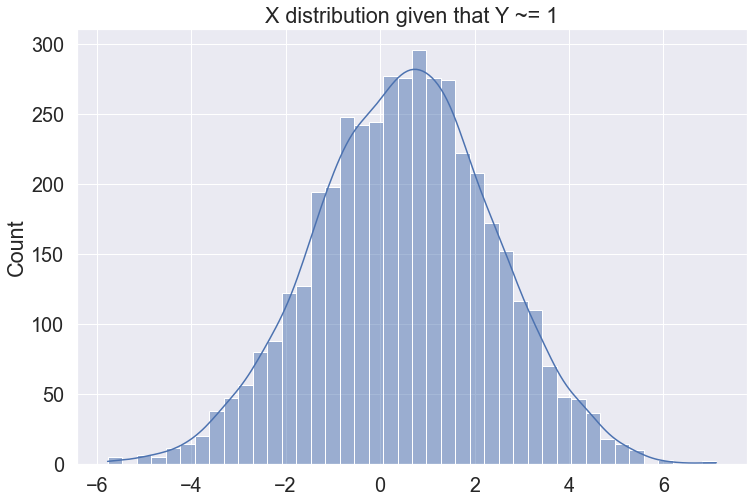

In [93]:
y_is_1_indices = np.where( (y > 0.99) & (y < 1.01) )
sns.histplot(x[y_is_1_indices], kde=True)
plt.title("X distribution given that Y ~= 1")

### Section 2

Using samples:

Text(0.5, 51.32800000000002, 'Y')

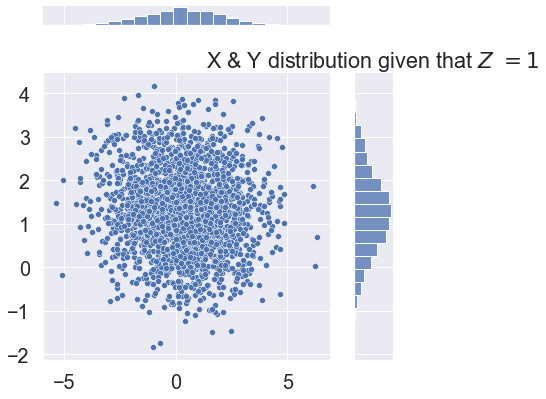

In [60]:
z_is_1_indices = np.where( (z > 0.99) & (z < 1.01) )
plot = sns.jointplot(x=x[z_is_1_indices], y=y[z_is_1_indices], marginal_kws=dict(bins=20))
plt.title("X & Y distribution given that Z ~= 1")
plot.fig.tight_layout()
plot.fig.subplots_adjust()
plt.xlabel("X")
plt.xlabel("Y")


### Section 3

Using samples:

Text(0.5, 1.0, 'Y distribution given that Z ~= 1 & X ~= 3')

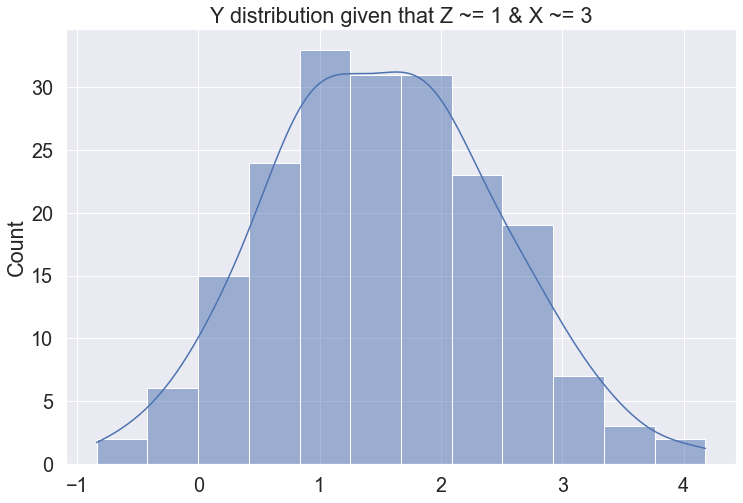

In [94]:
z_is_2_and_x_is_3_indices = np.where( (z > 1.99) & (z < 2.01) & (x > 2.99) & (z < 3.01))
sns.histplot(y[z_is_2_and_x_is_3_indices], kde=True)
plt.title("Y distribution given that Z ~= 1 & X ~= 3")

### Section 4

Using samples:

In [67]:
z_is_2_and_x_is_3_indices = np.where( (z > 1.99) & (z < 2.01) & (x > 2.99) & (z < 3.01))
y_filtered = y[z_is_2_and_x_is_3_indices]
y_filtered_in_range = y_filtered[np.where( (y_filtered > -1) & (y_filtered < 1) )]

print(f"The probability is: {len(y_filtered_in_range) / SIZE * 100:.5f}%")
                                 

The probability is: 0.00620%


## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [ ]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [ ]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>